## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

sns.set()
np.set_printoptions(suppress=True, precision = 2, linewidth=100) # Just formart the printout to screen for better viewing

# Simple Linear Regression with statsmodels

In [2]:
dataset = pd.read_csv('Linear-Regression-Simple-Data.csv')
data = dataset.copy()

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Defining the dependent and independent variables

In [5]:
y = data["GPA"] # GPA (y) is the dependent variable since it depends on SAT
x1 = data["SAT"]  # SAT (x1) is the independent variable(s) since it affects the GPA varialbe

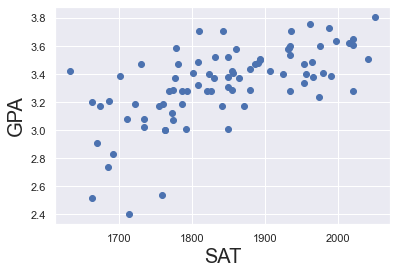

In [6]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1,y)
# Name the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
# Show the plot
plt.show()

# Performing Regression using statmodels

In [7]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           7.20e-11
Time:                        18:46:07   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

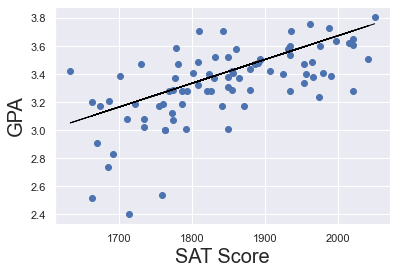

In [8]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 0.0017*x1 + 0.275  # y = b0 +bx1 (b0 = 0.0017) and (b1 = 0.275) are gotten from the second table
# => GPA = 0.275 + 0.0017 * SAT  (SAT = x1)

# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=1, c='black', label ='regression line')
# Label the axes
plt.xlabel("SAT Score", fontsize=20)
plt.ylabel("GPA", fontsize=20)
# plt.xlim(0)
# plt.ylim(0)
plt.show()

In [9]:
# 	R-squared:	0.406 means SAT scores explains 46% variability of the GPA.
# This means that we are certainly missing some important info that determine/influence GPA

# Multiple linear regression and adjusted R-squared

In [10]:
mlr_data = pd.read_csv("Multiple-linear-regression.csv")
mlr_dataset = mlr_data.copy()
mlr_dataset

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [11]:
mlr_dataset.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [12]:
y = mlr_dataset["GPA"]
x2 = mlr_dataset[["SAT", "Rand 1,2,3"]]

In [13]:
# You can't plot variables of different length
# plt.scatter(x2, y)
# plt.ylabel("GPA")
# plt.xlabel("SAT Rand")
# plt.show()

In [14]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x2)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           6.58e-10
Time:                        18:46:08   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression With Categorical Data Using Dummy Variables

In [24]:
mlr_cat_dataset = pd.read_csv("Dummies.csv")
mlr_cat_data = mlr_cat_dataset.copy()
mlr_cat_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [26]:
# Since Attendance is a categorical data, I need to transform it into numerical by using numpy's where

# mlr_cat_data["Attendance"] = np.where(mlr_cat_data["Attendance"]=='Yes', 1, 0)                                     
# mlr_cat_data

# or Using map

mlr_cat_data["Attendance"] = mlr_cat_data["Attendance"].map({'Yes': 1, 'No': 0})
mlr_cat_data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [27]:
mlr_cat_data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


 ## Regression 

In [33]:
# Following the regression equation, our dependent variable (y) is the GPA
y = mlr_cat_data["GPA"]

# Similarly, our independent variable (x) is the SAT score
x1 = mlr_cat_data[["SAT", "Attendance"]]

In [34]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           2.19e-15
Time:                        20:17:33   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From this new model, we see: 
1. An increase in the **R-squared** and **Adj. R-squared**
2. An acceptable **p-values** of **SAT** and **Attendance** 
3. And a significant **F-statistic:** of 52.70

The **Attendance** greatly increase the accuracy of the model

## Plot the regression line(s) on the scatter plot

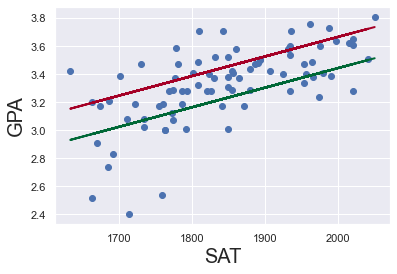

In [37]:
# Create a scatter plot of SAT and GPA
plt.scatter(mlr_cat_data['SAT'],y)
# Define the two regression equations, depending on whether they attended (yes), or didn't (no)
yhat_no = 0.6439 + 0.0014*mlr_cat_data['SAT']
yhat_yes = 0.8665 + 0.0014*mlr_cat_data['SAT']
# Plot the two regression lines
fig = plt.plot(mlr_cat_data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(mlr_cat_data['SAT'],yhat_yes, lw=2, c='#a50026')
# Name your axes :)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Plot the regression line(s) on the scatter plot and color the data points

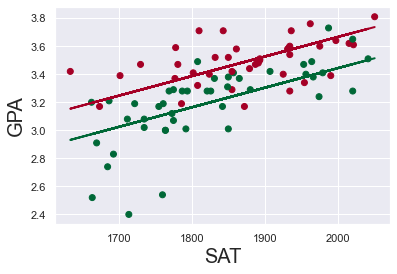

In [39]:
# In this code I want to colour the points depending on attendance
# Note: This code would have been very easy in Seaborn

# Create one scatter plot which contains all observations
# Use the series 'Attendance' as color, and choose a colour map of your choice
# The colour map we've chosen is completely arbitrary
plt.scatter(mlr_cat_data['SAT'],mlr_cat_data['GPA'], c=mlr_cat_data['Attendance'],cmap='RdYlGn_r')

# Define the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
yhat_no = 0.6439 + 0.0014*mlr_cat_data['SAT']
yhat_yes = 0.8665 + 0.0014*mlr_cat_data['SAT']

# Plot the two regression lines
fig = plt.plot(mlr_cat_data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(mlr_cat_data['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Add the original regression line

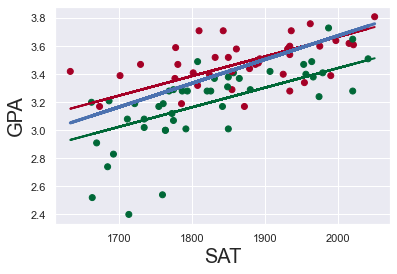

In [40]:
# Same as above, this time we are including the regression line WITHOUT the dummies.

# In this code I want to color the points depending on attendance
# Note: This code would have been very easy in Seaborn

# Create one scatter plot which contains all observations
# Use the series 'Attendance' as color, and choose a colour map of your choice
# The colour map we've chosen is completely arbitrary
plt.scatter(mlr_cat_data['SAT'],mlr_cat_data['GPA'], c=mlr_cat_data['Attendance'],cmap='RdYlGn_r')

# Define the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
yhat_no = 0.6439 + 0.0014*mlr_cat_data['SAT']
yhat_yes = 0.8665 + 0.0014*mlr_cat_data['SAT']
# Original regression line
yhat = 0.0017*mlr_cat_data['SAT'] + 0.275

# Plot the two regression lines
fig = plt.plot(mlr_cat_data['SAT'],yhat_no, lw=2, c='#006837', label ='regression line1')
fig = plt.plot(mlr_cat_data['SAT'],yhat_yes, lw=2, c='#a50026', label ='regression line2')
# Plot the original regression line
fig = plt.plot(mlr_cat_data['SAT'],yhat, lw=3, c='#4C72B0', label ='regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()